In [1]:
# Importer les packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
# Ouvrir la base de données
df=pd.read_csv('/content/AirPassengers.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
# Sélectionner que la colonne passagers et mettre sous forme d'array
# Ce n'est plus un DataFrame
data = df[['#Passengers']].values
data

In [ ]:
# Préparation de la base de données
# NORMALISATION
sc = MinMaxScaler(feature_range=(0,1))
data_scaled = sc.fit_transform(data)


In [ ]:
data_scaled

In [ ]:
# Séparer les données en input et output
# L'entrée ce sont les données du mois précédent
# La sortie ce sont les données du mois suivant
x_data = []
y_data = []
look_back = 1
for i in range(len(data_scaled)-1):
  x_data.append(data_scaled[i:(i+look_back),0])
  y_data.append(data_scaled[i+look_back, 0])
x_data,y_data = np.array(x_data), np.array(y_data)
print(x_data)
print(y_data)


In [ ]:
# Reshaping pour mettre x_data en 3 dimensions
x_data = np.reshape(x_data,(x_data.shape[0], x_data.shape[1], 1))
x_data.shape

(143, 1, 1)

In [ ]:
# Split data into Test and Train
train_size = int(len(x_data)*0.7)
test_size = len(x_data)-train_size
x_train = x_data[:train_size:]
x_test = x_data[train_size:len(x_data):]
y_train = y_data[0:train_size]
y_test = y_data[train_size:len(y_data)]

In [ ]:
x_train.shape

(100, 1, 1)

In [ ]:
y_train.shape

(100,)

In [ ]:
x_test.shape

(43, 1, 1)

In [ ]:
y_test.shape

(43,)

In [ ]:
# Construction de RNN ( réseau de neurones récurrents)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))


In [ ]:
# Ajouter la couche de sortie
model.add(Dense(units=1))

In [ ]:
# Problème de régression donc on utilise mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

In [ ]:
#Fiitting model
model.fit(x_train,y_train ,epochs=100, batch_size=32)

In [ ]:
# Faire des précisions
y_pred = model.predict(x_test)

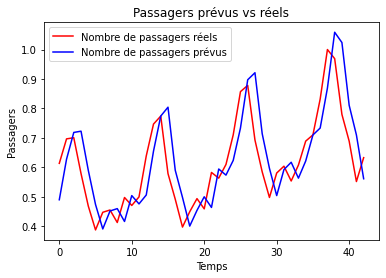

In [ ]:
# Visualiser les résultats
plt.plot(y_test , color ='red', label='Nombre de passagers réels')
plt.plot(y_pred , color ='blue', label='Nombre de passagers prévus')
plt.title('Passagers prévus vs réels')
plt.xlabel('Temps')
plt.ylabel('Passagers')
plt.legend()
plt.show()
